Prepared by

*Asif Newaz*

*Lecturer, EEE, IUT*

In [52]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import random
import shutil

**Mounting Drive**

In [2]:
%cd /content/drive/MyDrive/electric circuit components

/content/drive/MyDrive/electric circuit components


**Data Visualization**

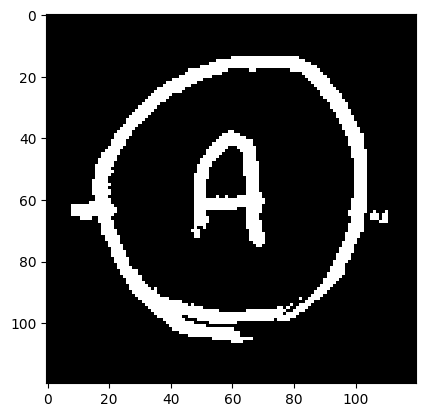

In [3]:
path = '/content/drive/MyDrive/electric circuit components/Ammeter/1.bmp'
img = tf.keras.preprocessing.image.load_img(path)
plt.imshow(img)

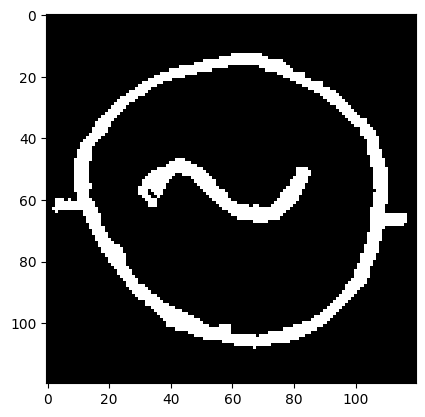

In [4]:
path = '/content/drive/MyDrive/electric circuit components/ac_src/1.bmp'
img = tf.keras.preprocessing.image.load_img(path)
plt.imshow(img)

**Directory**

In [5]:
directory_path = '/content/drive/MyDrive/electric circuit components'
directory_files = os.listdir(directory_path)

In [6]:

for file_name in directory_files:
    print(file_name)

dc_volt_src_1
curr_src
battery
dc_volt_src_2
cap
Ammeter
dep_volt
dep_curr_src
ac_src
diode
gnd_2
voltmeter
resistor
inductor
gnd_1


In [7]:
# to access sub-directory, use os.walk
for root, dirs, files in os.walk(directory_path):
    for file_name in files:
        print(os.path.join(root, file_name))

/content/drive/MyDrive/electric circuit components/dc_volt_src_1/106.bmp
/content/drive/MyDrive/electric circuit components/dc_volt_src_1/103.bmp
/content/drive/MyDrive/electric circuit components/dc_volt_src_1/102.bmp
/content/drive/MyDrive/electric circuit components/dc_volt_src_1/101.bmp
/content/drive/MyDrive/electric circuit components/dc_volt_src_1/108.bmp
/content/drive/MyDrive/electric circuit components/dc_volt_src_1/104.bmp
/content/drive/MyDrive/electric circuit components/dc_volt_src_1/100.bmp
/content/drive/MyDrive/electric circuit components/dc_volt_src_1/1.bmp
/content/drive/MyDrive/electric circuit components/dc_volt_src_1/107.bmp
/content/drive/MyDrive/electric circuit components/dc_volt_src_1/10.bmp
/content/drive/MyDrive/electric circuit components/dc_volt_src_1/105.bmp
/content/drive/MyDrive/electric circuit components/dc_volt_src_1/109.bmp
/content/drive/MyDrive/electric circuit components/dc_volt_src_1/156.bmp
/content/drive/MyDrive/electric circuit components/dc_

**Displaying multiple images together**

In [8]:
images=[]
for root, dirs, files in os.walk(directory_path):
    for file_name in files:
        images.append(os.path.join(root, file_name))

In [9]:
random_sample = random.sample(images, 25)

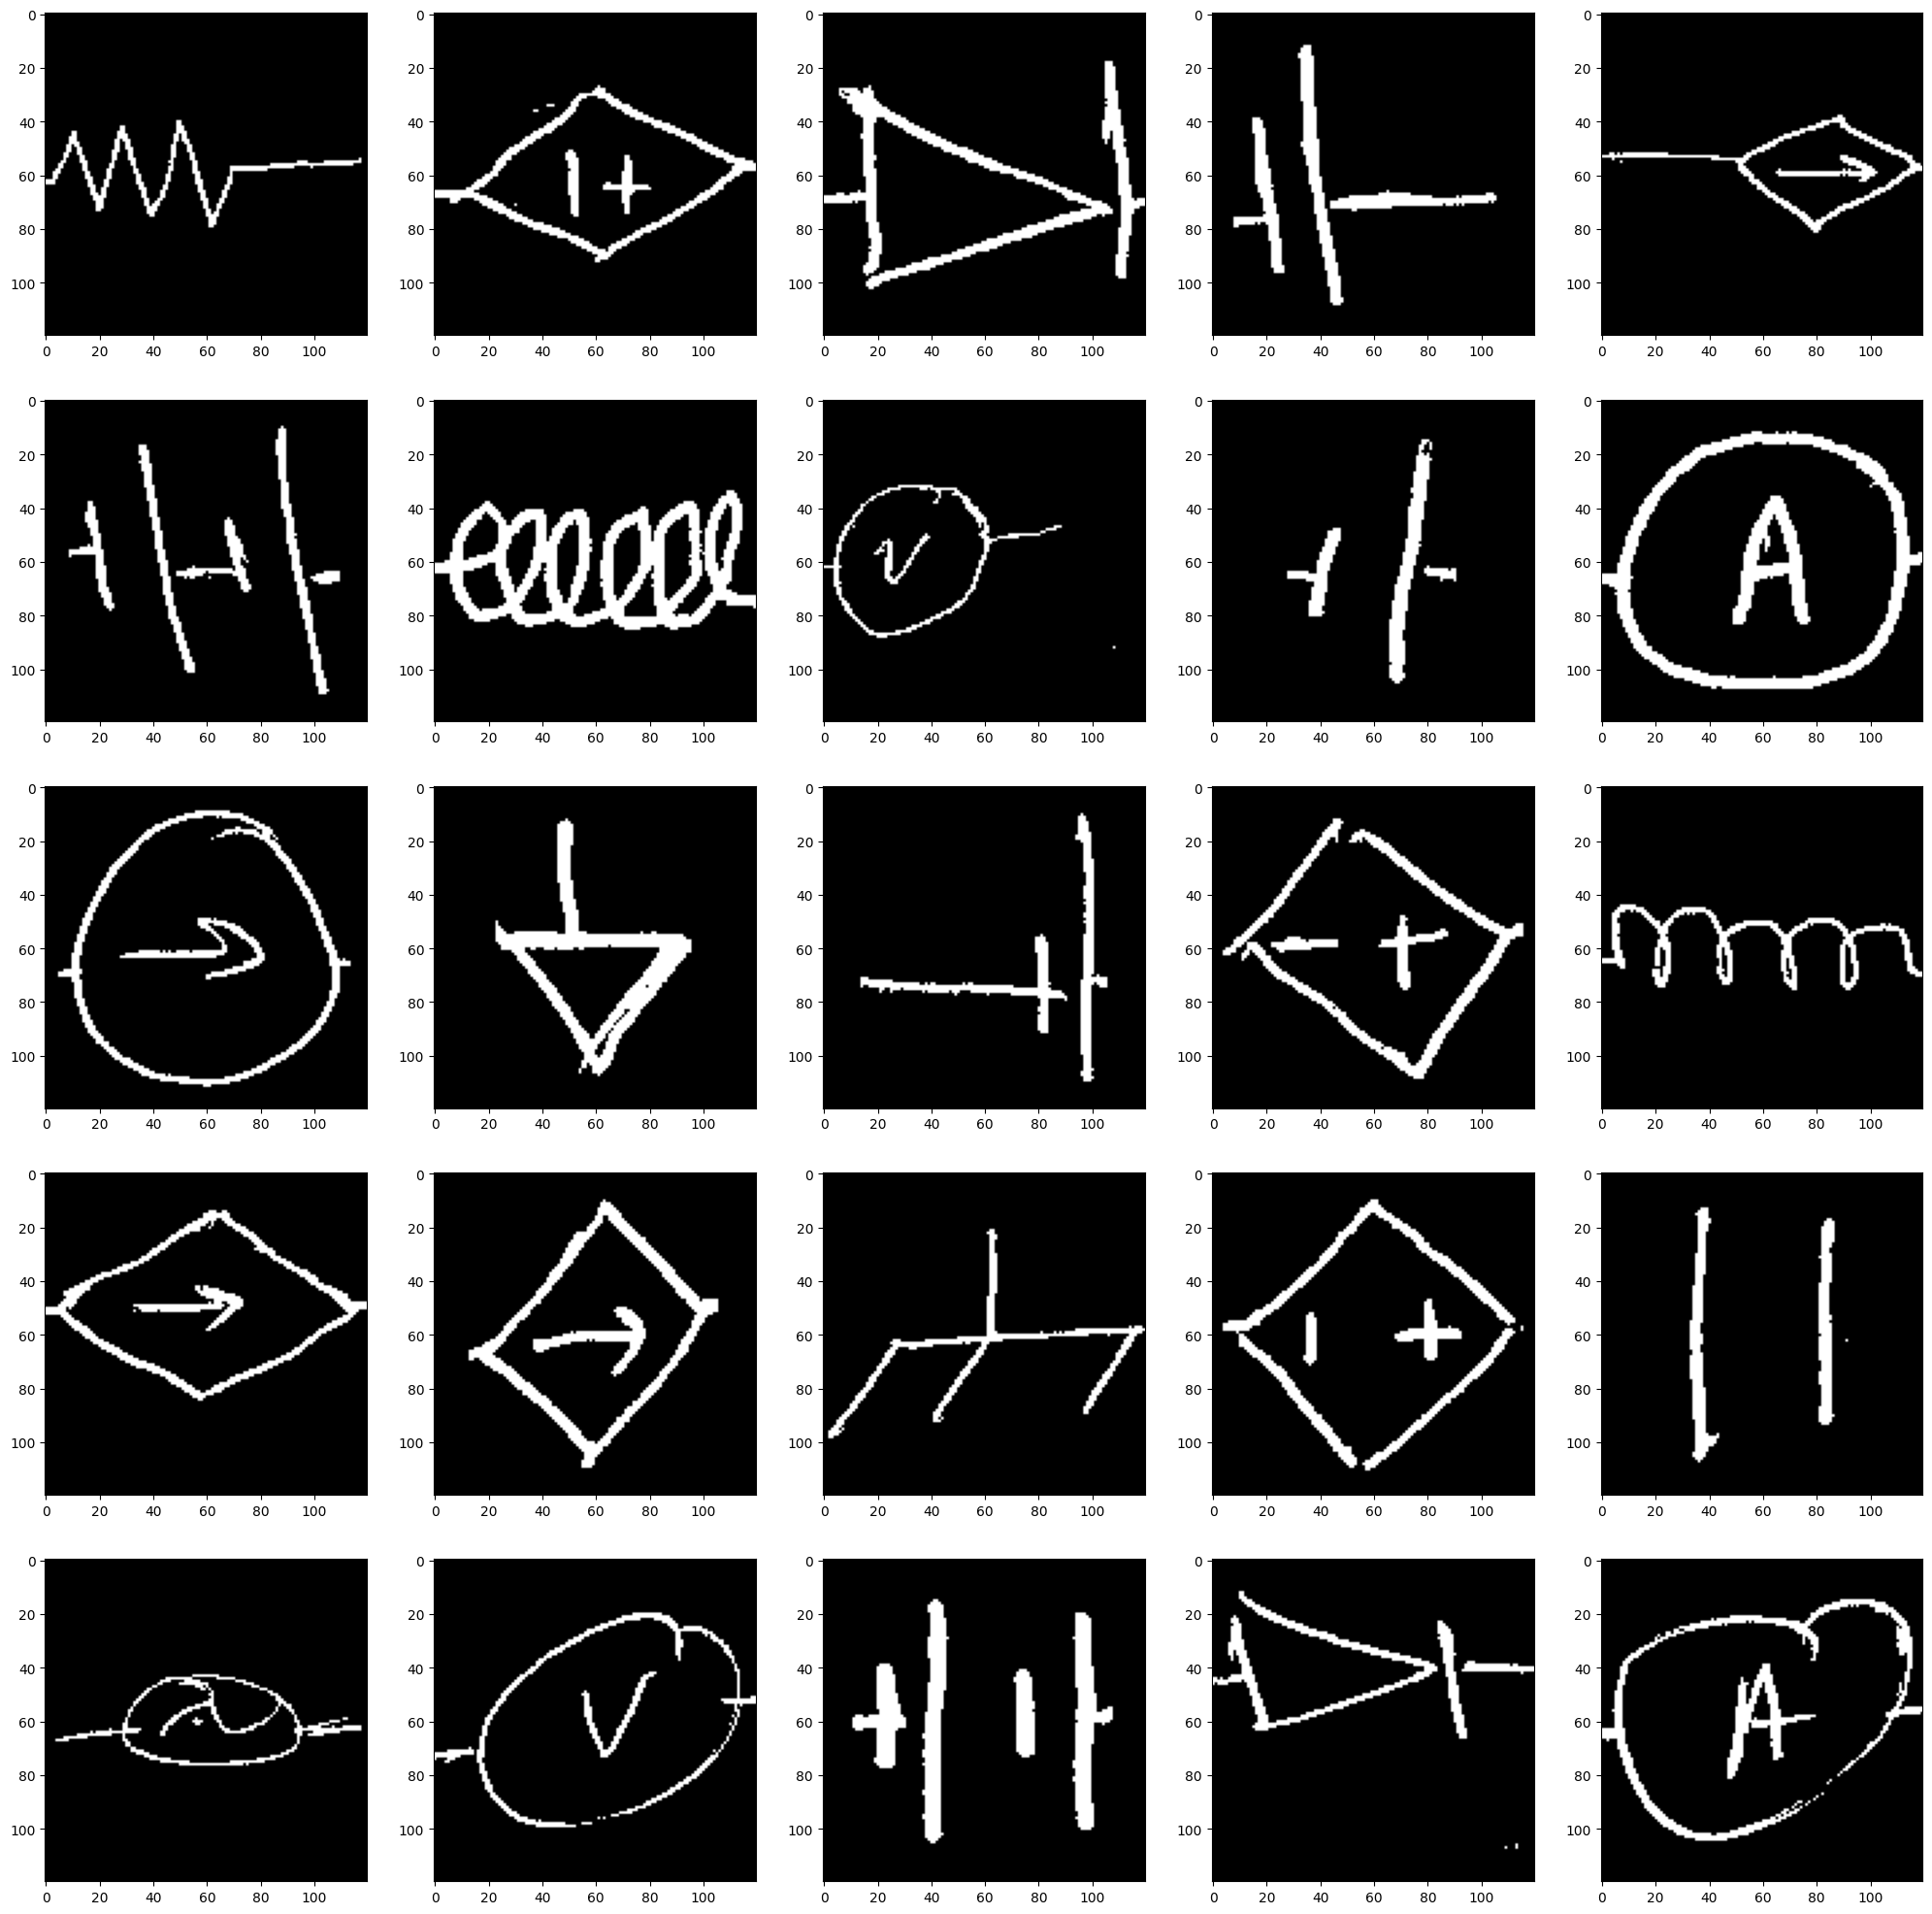

In [10]:
plt.figure(figsize=(25, 25))

for i in range(25):
  plt.subplot(5, 5, i + 1)
  path= random_sample[i]
  img = tf.keras.preprocessing.image.load_img(path)
  plt.imshow(img)

**Dataset Information**

In [11]:
for i in range(10):
  path= random_sample[i]
  img = tf.keras.preprocessing.image.load_img(path)
  print(img.size)

(120, 120)
(120, 120)
(120, 120)
(120, 120)
(120, 120)
(120, 120)
(120, 120)
(120, 120)
(120, 120)
(120, 120)


All images are of same size

In [12]:
len(images)

2952

In total, 2952 images in the dataset.

In [13]:
# we want to know how many images in each category
sub_dir=[]
for file_name in directory_files:
    sub_dir.append(file_name)
print(sub_dir)

['dc_volt_src_1', 'curr_src', 'battery', 'dc_volt_src_2', 'cap', 'Ammeter', 'dep_volt', 'dep_curr_src', 'ac_src', 'diode', 'gnd_2', 'voltmeter', 'resistor', 'inductor', 'gnd_1']


In [14]:
directory_path+ '/'+ sub_dir[0]

'/content/drive/MyDrive/electric circuit components/dc_volt_src_1'

In [15]:
for i in range(len(sub_dir)):
  count= 0
  for j in os.listdir(directory_path + '/' + sub_dir [i]):
    count = count + 1
  print(sub_dir [i], count)

dc_volt_src_1 199
curr_src 200
battery 200
dc_volt_src_2 199
cap 200
Ammeter 200
dep_volt 196
dep_curr_src 197
ac_src 199
diode 200
gnd_2 198
voltmeter 200
resistor 188
inductor 194
gnd_1 182


almost same for all categories. No imbalance.

**Dividing the images into Training and Testing folds**

In [16]:
# Define paths to the data folders
data_dir = '/content/drive/MyDrive/electric circuit components'
train_dir = '/content/drive/My Drive/training_data'
test_dir = '/content/drive/My Drive/testing_data'

# Create directories for training and testing data
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# split ratio
ratio = 0.75

In [17]:
for category in os.listdir(data_dir):
  print(category)

dc_volt_src_1
curr_src
battery
dc_volt_src_2
cap
Ammeter
dep_volt
dep_curr_src
ac_src
diode
gnd_2
voltmeter
resistor
inductor
gnd_1


In [18]:
# Iterate through the folders containing the data
for category in os.listdir(data_dir):
    category_dir = os.path.join(data_dir, category)

    # Create corresponding directories in the train and test folders
    train_category_dir = os.path.join(train_dir, category)
    test_category_dir = os.path.join(test_dir, category)
    os.makedirs(train_category_dir, exist_ok=True)
    os.makedirs(test_category_dir, exist_ok=True)

    # List all images in the category directory
    images = os.listdir(category_dir)

    # Shuffle the images
    random.shuffle(images)

     # Split the images into training and testing sets
    train_count = int(len(images) * ratio)
    train_images = images[:train_count]
    test_images = images[train_count:]

    # Move images to the appropriate directories
    for image in train_images:
        src = os.path.join(category_dir, image)
        dst = os.path.join(train_category_dir, image)
        shutil.copy(src, dst)

    for image in test_images:
        src = os.path.join(category_dir, image)
        dst = os.path.join(test_category_dir, image)
        shutil.copy(src, dst)

**Defining training and validation set**

In [21]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
training_set = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=(120,120))
val_dataset = image_dataset_from_directory(test_dir,
                                                  shuffle=True,
                                                  batch_size=32,
                                                  image_size=(120,120))

Found 2761 files belonging to 15 classes.
Found 1291 files belonging to 15 classes.


Data augmentation opportunity is limited here as flipping or rotating image can change the original image information.

**Model Define**

In [34]:
model = tf.keras.Sequential(
    [
    tf.keras.layers.Conv2D(32, (11, 11), padding= 'same', activation="relu",input_shape=(120, 120, 3)),
    tf.keras.layers.Conv2D(64, (7,7), padding= 'same', activation="relu"),

    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(128, (3,3), padding= 'same',  activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3,3), padding= 'same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(256, (3,3), padding= 'same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(256, (3,3), padding= 'valid', activation="relu"),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(640, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(15, activation="softmax")
]
)

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 120, 120, 32)      11648     
                                                                 
 conv2d_19 (Conv2D)          (None, 120, 120, 64)      100416    
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 60, 60, 64)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_9 (Bat  (None, 60, 60, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_20 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 30, 30, 128)      

In [36]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [39]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# etrics=['accuracy', 'precision', 'recall'])

ValueError: Shapes (None, 1) and (None, 15) are incompatible.

The error arose because 'categorical_crossentropy' works on one-hot encoded target, while 'sparse_categorical_crossentropy' works on integer target.

In [40]:
history = model.fit(training_set,
                    epochs=50,
                    validation_data= val_dataset,
                    callbacks=early_stop)

Epoch 1/50
87/87 [==============================] - 232s 2s/step - loss: 1.4499 - accuracy: 0.5462 - val_loss: 10.0787 - val_accuracy: 0.2130
Epoch 2/50
87/87 [==============================] - 5s 53ms/step - loss: 0.7529 - accuracy: 0.7591 - val_loss: 1.8487 - val_accuracy: 0.5445
Epoch 3/50
87/87 [==============================] - 5s 54ms/step - loss: 0.4978 - accuracy: 0.8348 - val_loss: 5.5832 - val_accuracy: 0.3284
Epoch 4/50
87/87 [==============================] - 5s 55ms/step - loss: 0.3397 - accuracy: 0.8855 - val_loss: 0.5701 - val_accuracy: 0.8242
Epoch 5/50
87/87 [==============================] - 5s 53ms/step - loss: 0.2387 - accuracy: 0.9239 - val_loss: 0.1805 - val_accuracy: 0.9442
Epoch 6/50
87/87 [==============================] - 5s 56ms/step - loss: 0.1556 - accuracy: 0.9547 - val_loss: 0.3488 - val_accuracy: 0.8939
Epoch 7/50
87/87 [==============================] - 5s 56ms/step - loss: 0.0927 - accuracy: 0.9732 - val_loss: 0.3780 - val_accuracy: 0.8784
Epoch 8/50
8

In [41]:
df = pd.DataFrame(history.history)
df.tail()

,loss,accuracy,val_loss,val_accuracy
34,0.026988,0.991307,2.114977,0.705655
35,0.030299,0.993118,0.044066,0.986057
36,0.014643,0.996378,0.030446,0.993029
37,0.006231,0.997465,0.026687,0.991479
38,0.003044,0.999276,0.021877,0.993803


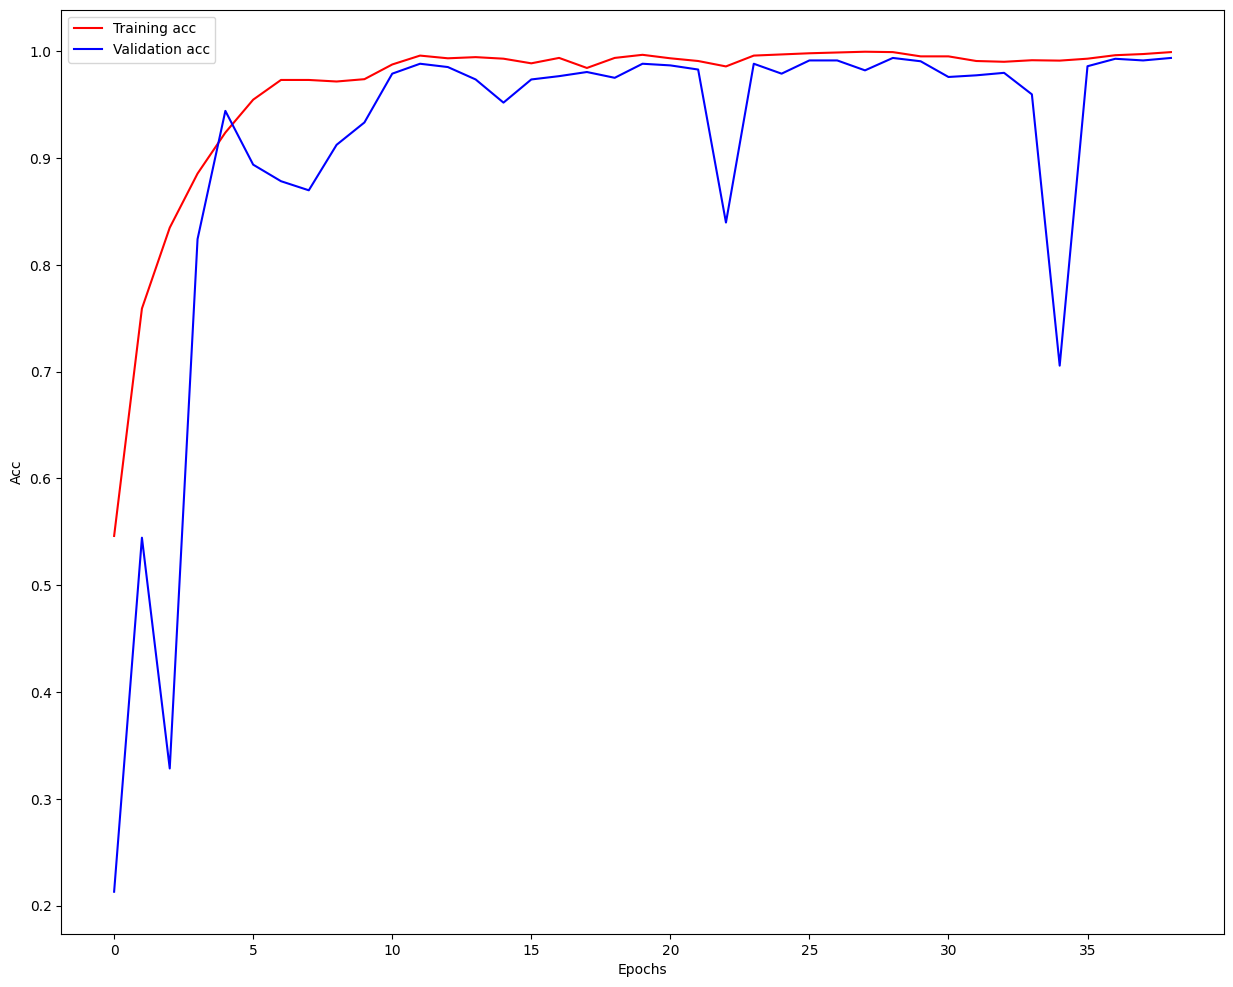

In [42]:
train_acc = df["accuracy"]
val_acc = df["val_accuracy"]
epochs = range(len(train_acc))

plt.figure(figsize=(15,12))
#plt.ylim([0.3, 0.9])
plt.plot(epochs, train_acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.show()

**Model Prediction**

1/1 [==============================] - 0s 24ms/step
13
1/1 [==============================] - 0s 20ms/step
8
1/1 [==============================] - 0s 21ms/step
9
1/1 [==============================] - 0s 20ms/step
6
1/1 [==============================] - 0s 20ms/step
7
1/1 [==============================] - 0s 21ms/step
2
1/1 [==============================] - 0s 20ms/step
12
1/1 [==============================] - 0s 21ms/step
14
1/1 [==============================] - 0s 20ms/step
6
1/1 [==============================] - 0s 20ms/step
0


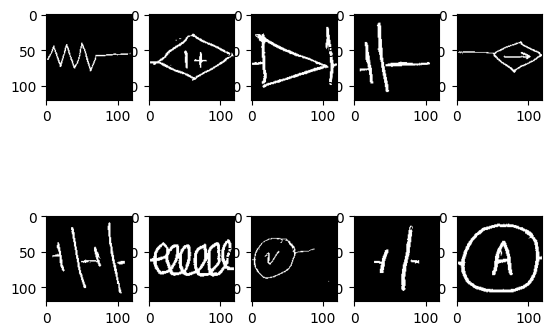

In [58]:
for i in range(10):
  plt.subplot(2,5, i + 1)
  path = random_sample[i]
  img = tf.keras.preprocessing.image.load_img(path)
  plt.imshow(img)

  pred_img= tf.keras.preprocessing.image.img_to_array(img)        # predict on the numpy array of the image
  pred_img_2 = pred_img.reshape((1,pred_img.shape[0], pred_img.shape[1], pred_img.shape[2]))        # u need to change the shape
  prediction= model.predict(pred_img_2)
  print(np.argmax(prediction))

In [57]:
classes = {i:sub_dir[i] for i in range(len(sub_dir))}
classes

{0: 'dc_volt_src_1',
 1: 'curr_src',
 2: 'battery',
 3: 'dc_volt_src_2',
 4: 'cap',
 5: 'Ammeter',
 6: 'dep_volt',
 7: 'dep_curr_src',
 8: 'ac_src',
 9: 'diode',
 10: 'gnd_2',
 11: 'voltmeter',
 12: 'resistor',
 13: 'inductor',
 14: 'gnd_1'}